**Импорт необходимых библиотек**

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint

**Импорт данных**

In [3]:
data = pd.read_csv('Admission_Predict.csv')

**Общая информация о данных**

In [4]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


Данная задача является регрессией, поскольку целевая переменная Chance of Admit представляет собой непрерывное числовое значение.

Кол-во строк 400 и столбцов: 9
Целевая переменная: Chance of Admit 
Кол-во уникальных значений целевой переменной: 60


<Axes: >

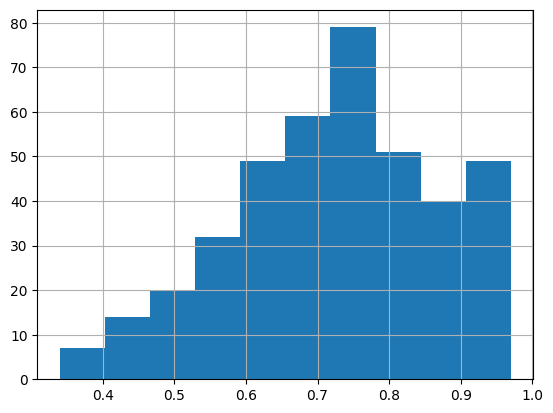

In [5]:
print(f'Кол-во строк {data.shape[0]} и столбцов: {data.shape[1]}')
target_variable = 'Chance of Admit '
print(f'Целевая переменная: {target_variable}')
print(f'Кол-во уникальных значений целевой переменной: {data[target_variable].nunique()}')
data[target_variable].hist()

In [6]:
print('Кол-во пропусов в колонках: ')
data.isnull().sum()

Кол-во пропусов в колонках: 


,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [7]:
print('Общая информация о датасете')
data[target_variable].describe()

Общая информация о датасете


,Chance of Admit
count,400.000000
mean,0.724350
std,0.142609
min,0.340000
25%,0.640000
50%,0.730000
75%,0.830000
max,0.970000


**Предобработка данных**

1. Нормированные численных переменных

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

y = data[target_variable]
X = data.drop(columns=[target_variable], axis=1)
X = X.drop('Serial No.', axis=1)

X_ans = StandardScaler().fit_transform(X)

In [9]:
X_ans

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

2. Разделение данных на тренировочную и тестовую выборки

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ans, y, test_size=0.2, random_state=42)

3. Кодирование категориальных признаков

In [11]:
qualitative_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

In [12]:
if qualitative_features:
    print("Качественные признаки есть:")
    print(qualitative_features)
else:
    print("Качественных признаков нет.")

Качественных признаков нет.


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


**Обучение моделей**

In [14]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

1. Линейную модель

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_model = model.predict(X_test)

mae_model = mean_squared_error(y_test, y_pred_model)
rmse_model = root_mean_squared_error(y_test, y_pred_model)

2. Деревянная модель

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

mae_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = root_mean_squared_error(y_test, y_pred_tree)

3. K-ближайших соседей

In [17]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

mae_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = root_mean_squared_error(y_test, y_pred_knn)

4. Случайный лес

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


mae_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)

**Метрики**

In [19]:
def MAPE(y_pred, y_true=y_test):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_model = MAPE(y_pred_model)
mape_tree = MAPE(y_pred_tree)
mape_knn = MAPE(y_pred_knn)
mape_rf = MAPE(y_pred_rf)

metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'KNN', 'Random Forest'],
    'MAE': [mae_model, mae_tree, mae_knn, mae_rf],
    'RMSE': [rmse_model, rmse_tree, rmse_knn, rmse_rf],
    'MAPE': [mape_model, mape_tree, mape_knn, mape_rf]
})

In [ ]:
metrics

,Model,MAE,RMSE,MAPE
0,Linear Regression,0.004617,0.067949,8.511849
1,Decision Tree,0.005362,0.073222,8.912698
2,KNN,0.006316,0.079476,9.780658
3,Random Forest,0.004983,0.070587,8.534845
